In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit, qtm.encoding

In [8]:
num_qubits = 3
num_layers = 3
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)

In [9]:
thetas = thetas_origin.copy()
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_haarchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 200/200 [26:26<00:00,  7.93s/it]


In [10]:
thetas = thetas_origin.copy()
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_haarchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 200/200 [28:21<00:00,  8.51s/it]


In [11]:
thetas = thetas_origin.copy()
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values_qng = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_haarchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 200/200 [25:36<00:00,  7.68s/it]


In [12]:
thetas = thetas_origin.copy()
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values_qng_adam = qtm.base.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_haarchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_adam,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 200/200 [27:09<00:00,  8.15s/it]


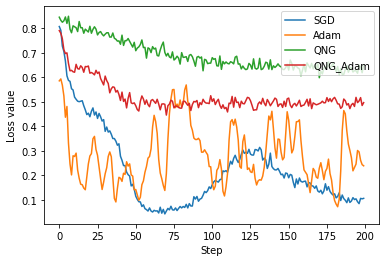

In [13]:
plt.plot(loss_values_sgd, label="SGD")
plt.plot(loss_values_adam, label="Adam")
plt.plot(loss_values_qng, label="QNG")
plt.plot(loss_values_qng_adam, label="qng_adam")
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend()
plt.show()